In [1]:
%reload_ext autoreload
%autoreload 2

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)


In [27]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl

from dbspace.utils.structures import nestdict
import dbspace as dbo
import seaborn as sns
sns.set_theme('paper')
sns.set_style("white")
import numpy as np
import pickle
from matplotlib.patches import Rectangle, Circle
from numpy import ndenumerate
from dbspace.readout.OBands import OBands

In [3]:
frame_to_analyse = 'Chronic_Frame_Dec2022'
do_weeks = ["C01","C24"]
correct_for_mismatch_compression = False

BRFrame = pickle.load(open(f"/tmp/{frame_to_analyse}.pickle","rb"))
BRFrame.check_meta()

INFO:root:Meta Checks Complete


In [4]:
#Move forward with traditional oscillatory band analysis
analysis = OBands(BRFrame, ['901','903','905','906','907','908'])
analysis.feat_extract(do_corrections=correct_for_mismatch_compression)

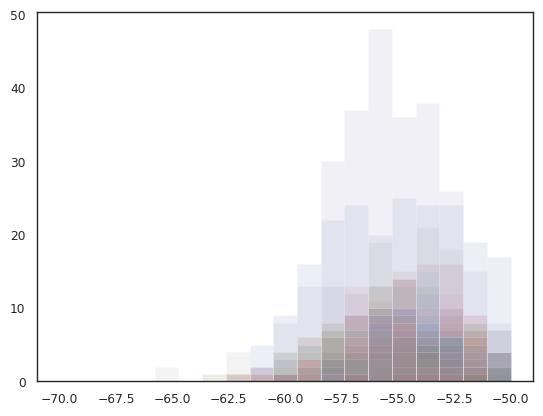

In [77]:
# for a single patient and week, plot the distribution for a single oscillation

weeks = dbo.readout.ClinVect.Phase_List('ephys')
for pt in ['906']:
    pt_stack = {week: [] for week in weeks}
    for week in ['C01']:
        for feature in ['Delta']:
            pt_recordings = [recording for recording in analysis.BRFrame.file_meta if recording['Patient'] == pt]
            for week in weeks:
                pt_stack[week] = [recording['FeatVect'] for recording in pt_recordings if recording['Phase'] == week]

pt_list = ([[recording['Delta']['Left'] for recording in pt_stack[week]] for week in weeks])
from itertools import zip_longest
pt_matrix = np.transpose(list(zip_longest(*pt_list, fillvalue=np.nan)))
for ii in range(28):
    plt.hist(pt_matrix[ii,:], bins=np.linspace(-70,-50,20),alpha=0.1)

plt.show()